In [2]:
csv_2_df = spark.read.csv("GyPmnAov.csv", header = "true")
csv_3 = csv_2_df.select("dateRep","countriesAndTerritories","deaths")
filtered = csv_3.filter(csv_2_df.countriesAndTerritories == "United_States_of_America")

In [3]:
from datetime import datetime
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DateType
func =  udf (lambda x: datetime.strptime(x, '%d/%m/%Y'), DateType())
df = filtered.withColumn('date', func(col('dateRep')))

In [4]:
df = df.select("date","countriesAndTerritories","deaths")

In [5]:
df.show()

+----------+-----------------------+------+
|      date|countriesAndTerritories|deaths|
+----------+-----------------------+------+
|2020-04-25|   United_States_of_...|  1054|
|2020-04-24|   United_States_of_...|  3179|
|2020-04-23|   United_States_of_...|  1721|
|2020-04-22|   United_States_of_...|  2524|
|2020-04-21|   United_States_of_...|  1857|
|2020-04-20|   United_States_of_...|  1772|
|2020-04-19|   United_States_of_...|  1856|
|2020-04-18|   United_States_of_...|  3770|
|2020-04-17|   United_States_of_...|  2299|
|2020-04-16|   United_States_of_...|  4928|
|2020-04-15|   United_States_of_...|  2408|
|2020-04-14|   United_States_of_...|  1541|
|2020-04-13|   United_States_of_...|  1500|
|2020-04-12|   United_States_of_...|  1831|
|2020-04-11|   United_States_of_...|  2087|
|2020-04-10|   United_States_of_...|  1873|
|2020-04-09|   United_States_of_...|  1922|
|2020-04-08|   United_States_of_...|  1906|
|2020-04-07|   United_States_of_...|  1342|
|2020-04-06|   United_States_of_

In [6]:
from pyspark.sql.types import IntegerType, FloatType
data_df = df.withColumn("deaths", df["deaths"].cast(IntegerType()))

In [7]:
data_df.show()
data_df.printSchema()

+----------+-----------------------+------+
|      date|countriesAndTerritories|deaths|
+----------+-----------------------+------+
|2020-04-25|   United_States_of_...|  1054|
|2020-04-24|   United_States_of_...|  3179|
|2020-04-23|   United_States_of_...|  1721|
|2020-04-22|   United_States_of_...|  2524|
|2020-04-21|   United_States_of_...|  1857|
|2020-04-20|   United_States_of_...|  1772|
|2020-04-19|   United_States_of_...|  1856|
|2020-04-18|   United_States_of_...|  3770|
|2020-04-17|   United_States_of_...|  2299|
|2020-04-16|   United_States_of_...|  4928|
|2020-04-15|   United_States_of_...|  2408|
|2020-04-14|   United_States_of_...|  1541|
|2020-04-13|   United_States_of_...|  1500|
|2020-04-12|   United_States_of_...|  1831|
|2020-04-11|   United_States_of_...|  2087|
|2020-04-10|   United_States_of_...|  1873|
|2020-04-09|   United_States_of_...|  1922|
|2020-04-08|   United_States_of_...|  1906|
|2020-04-07|   United_States_of_...|  1342|
|2020-04-06|   United_States_of_

In [8]:
csv_2_df = spark.read.csv("vixcurrent.csv", header = "true")


In [9]:
csv_3 = csv_2_df.select("date","VIX High")


In [10]:
from datetime import *
func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())


In [11]:
df_vix = csv_3.withColumn('date', func(col('date')))


In [12]:
df_vix.show()

+----------+--------+
|      date|VIX High|
+----------+--------+
|2004-01-02|   18.68|
|2004-01-05|   18.49|
|2004-01-06|   17.67|
|2004-01-07|   16.75|
|2004-01-08|   15.68|
|2004-01-09|   16.88|
|2004-01-12|   17.46|
|2004-01-13|   18.33|
|2004-01-14|    17.3|
|2004-01-15|   17.31|
|2004-01-16|   15.44|
|2004-01-20|   16.13|
|2004-01-21|   15.63|
|2004-01-22|   14.87|
|2004-01-23|   15.05|
|2004-01-26|   15.78|
|2004-01-27|   15.44|
|2004-01-28|   17.06|
|2004-01-29|   17.66|
|2004-01-30|   17.35|
+----------+--------+
only showing top 20 rows



In [13]:
df_vix = df_vix.withColumn("VIX High", df_vix["VIX High"].cast(FloatType()))

In [14]:
df_vix.show()
df_vix.printSchema()

+----------+--------+
|      date|VIX High|
+----------+--------+
|2004-01-02|   18.68|
|2004-01-05|   18.49|
|2004-01-06|   17.67|
|2004-01-07|   16.75|
|2004-01-08|   15.68|
|2004-01-09|   16.88|
|2004-01-12|   17.46|
|2004-01-13|   18.33|
|2004-01-14|    17.3|
|2004-01-15|   17.31|
|2004-01-16|   15.44|
|2004-01-20|   16.13|
|2004-01-21|   15.63|
|2004-01-22|   14.87|
|2004-01-23|   15.05|
|2004-01-26|   15.78|
|2004-01-27|   15.44|
|2004-01-28|   17.06|
|2004-01-29|   17.66|
|2004-01-30|   17.35|
+----------+--------+
only showing top 20 rows

root
 |-- date: date (nullable = true)
 |-- VIX High: float (nullable = true)



In [15]:
import datetime, time 
dates = ("2019-12-30 00:00:00",  "2020-4-25 00:00:00")
from pyspark.sql.functions import col
df_vix_filtered = df_vix.where(col('date').between(*dates))

In [16]:
df_vix_filtered.show()

+----------+--------+
|      date|VIX High|
+----------+--------+
|2019-12-31|   15.39|
|2020-01-02|   13.72|
|2020-01-03|    16.2|
|2020-01-06|   16.39|
|2020-01-07|   14.46|
|2020-01-08|   15.24|
|2020-01-09|   13.24|
|2020-01-10|   12.87|
|2020-01-13|   13.09|
|2020-01-14|   13.82|
|2020-01-15|   12.83|
|2020-01-16|   12.42|
|2020-01-17|   12.48|
|2020-01-21|   13.33|
|2020-01-22|   13.01|
|2020-01-23|   14.15|
|2020-01-24|   15.98|
|2020-01-27|   19.02|
|2020-01-28|   18.03|
|2020-01-29|   16.65|
+----------+--------+
only showing top 20 rows



In [66]:
inner_join = df.join(df_vix_filtered, on=['date'], how='inner')

In [67]:
inner_join.show()

+----------+-----------------------+------+--------+
|      date|countriesAndTerritories|deaths|VIX High|
+----------+-----------------------+------+--------+
|2020-04-24|                  China|     0|   42.08|
|2020-04-23|                  China|     0|   42.47|
|2020-04-22|                  China|     0|   45.07|
|2020-04-21|                  China|     0|   47.77|
|2020-04-20|                  China|     0|   43.83|
|2020-04-17|                  China|  1290|   40.26|
|2020-04-16|                  China|     0|   43.02|
|2020-04-15|                  China|     1|   43.23|
|2020-04-14|                  China|     0|   40.57|
|2020-04-13|                  China|     2|   45.04|
|2020-04-09|                  China|     2|   45.73|
|2020-04-08|                  China|     2|   47.28|
|2020-04-07|                  China|     0|   47.51|
|2020-04-06|                  China|     2|   45.73|
|2020-04-03|                  China|    10|   52.29|
|2020-04-02|                  China|     6|   

In [19]:
df_sorted = inner_join.sort(col("date"))

In [20]:
df_sorted = df_sorted.withColumn("deaths", df_sorted["deaths"].cast(IntegerType()))
df_sorted.show()
df_sorted.printSchema()

+----------+-----------------------+------+--------+
|      date|countriesAndTerritories|deaths|VIX High|
+----------+-----------------------+------+--------+
|2019-12-31|   United_States_of_...|     0|   15.39|
|2020-01-02|   United_States_of_...|     0|   13.72|
|2020-01-03|   United_States_of_...|     0|    16.2|
|2020-01-06|   United_States_of_...|     0|   16.39|
|2020-01-07|   United_States_of_...|     0|   14.46|
|2020-01-08|   United_States_of_...|     0|   15.24|
|2020-01-09|   United_States_of_...|     0|   13.24|
|2020-01-10|   United_States_of_...|     0|   12.87|
|2020-01-13|   United_States_of_...|     0|   13.09|
|2020-01-14|   United_States_of_...|     0|   13.82|
|2020-01-15|   United_States_of_...|     0|   12.83|
|2020-01-16|   United_States_of_...|     0|   12.42|
|2020-01-17|   United_States_of_...|     0|   12.48|
|2020-01-21|   United_States_of_...|     0|   13.33|
|2020-01-22|   United_States_of_...|     0|   13.01|
|2020-01-23|   United_States_of_...|     0|   

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
panda_df = df_sorted.toPandas()

In [44]:
panda_df

,date,countriesAndTerritories,deaths,VIX High
0,2019-12-31,United_States_of_America,0,15.390000
1,2020-01-02,United_States_of_America,0,13.720000
2,2020-01-03,United_States_of_America,0,16.200001
3,2020-01-06,United_States_of_America,0,16.389999
4,2020-01-07,United_States_of_America,0,14.460000
...,...,...,...,...
75,2020-04-20,United_States_of_America,1772,43.830002
76,2020-04-21,United_States_of_America,1857,47.770000
77,2020-04-22,United_States_of_America,2524,45.070000
78,2020-04-23,United_States_of_America,1721,42.470001


In [23]:
import matplotlib.pyplot as plt
import pandas as pd

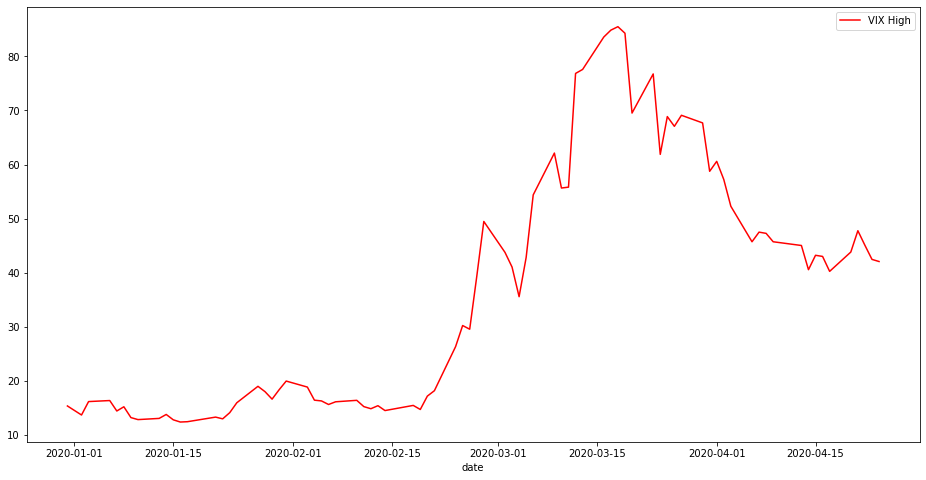

In [52]:
ax = plt.gca()

panda_df.plot(kind='line',x='date',y='VIX High', color='red', ax=ax, figsize=(16,8))

plt.show()

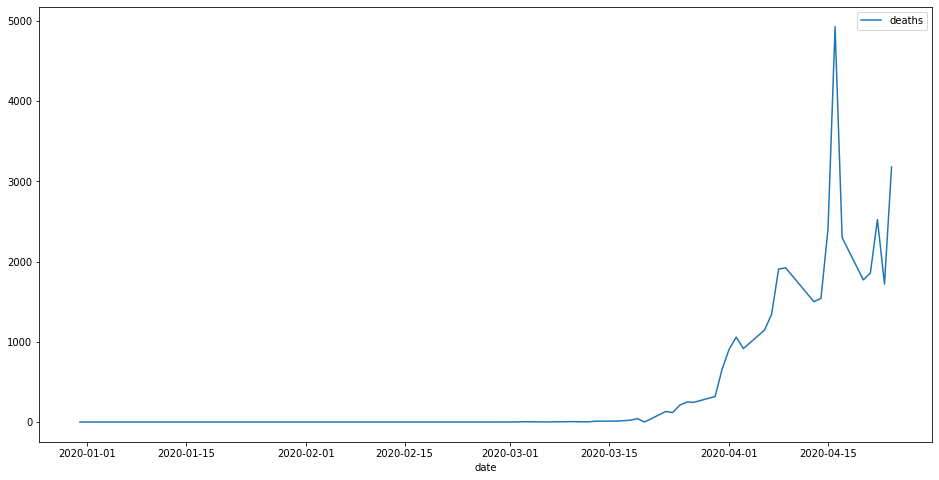

In [50]:
ax = plt.gca()

panda_df.plot(kind='line',x='date',y='deaths',ax=ax, figsize=(16,8))

plt.show()

In [40]:
from pyspark.sql import Window
from pyspark.sql import functions as F

windowval = (Window.partitionBy('countriesAndTerritories').orderBy('date')
             .rangeBetween(Window.unboundedPreceding, 0))
df_w_cumsum = df_sorted.withColumn('cum_sum', F.sum('deaths').over(windowval))
df_w_cumsum.show()

+----------+-----------------------+------+--------+-------+
|      date|countriesAndTerritories|deaths|VIX High|cum_sum|
+----------+-----------------------+------+--------+-------+
|2019-12-31|   United_States_of_...|     0|   15.39|      0|
|2020-01-02|   United_States_of_...|     0|   13.72|      0|
|2020-01-03|   United_States_of_...|     0|    16.2|      0|
|2020-01-06|   United_States_of_...|     0|   16.39|      0|
|2020-01-07|   United_States_of_...|     0|   14.46|      0|
|2020-01-08|   United_States_of_...|     0|   15.24|      0|
|2020-01-09|   United_States_of_...|     0|   13.24|      0|
|2020-01-10|   United_States_of_...|     0|   12.87|      0|
|2020-01-13|   United_States_of_...|     0|   13.09|      0|
|2020-01-14|   United_States_of_...|     0|   13.82|      0|
|2020-01-15|   United_States_of_...|     0|   12.83|      0|
|2020-01-16|   United_States_of_...|     0|   12.42|      0|
|2020-01-17|   United_States_of_...|     0|   12.48|      0|
|2020-01-21|   United_St

In [41]:
df_w_cumsum.show(100)

+----------+-----------------------+------+--------+-------+
|      date|countriesAndTerritories|deaths|VIX High|cum_sum|
+----------+-----------------------+------+--------+-------+
|2019-12-31|   United_States_of_...|     0|   15.39|      0|
|2020-01-02|   United_States_of_...|     0|   13.72|      0|
|2020-01-03|   United_States_of_...|     0|    16.2|      0|
|2020-01-06|   United_States_of_...|     0|   16.39|      0|
|2020-01-07|   United_States_of_...|     0|   14.46|      0|
|2020-01-08|   United_States_of_...|     0|   15.24|      0|
|2020-01-09|   United_States_of_...|     0|   13.24|      0|
|2020-01-10|   United_States_of_...|     0|   12.87|      0|
|2020-01-13|   United_States_of_...|     0|   13.09|      0|
|2020-01-14|   United_States_of_...|     0|   13.82|      0|
|2020-01-15|   United_States_of_...|     0|   12.83|      0|
|2020-01-16|   United_States_of_...|     0|   12.42|      0|
|2020-01-17|   United_States_of_...|     0|   12.48|      0|
|2020-01-21|   United_St

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
panda_df = df_w_cumsum.toPandas()

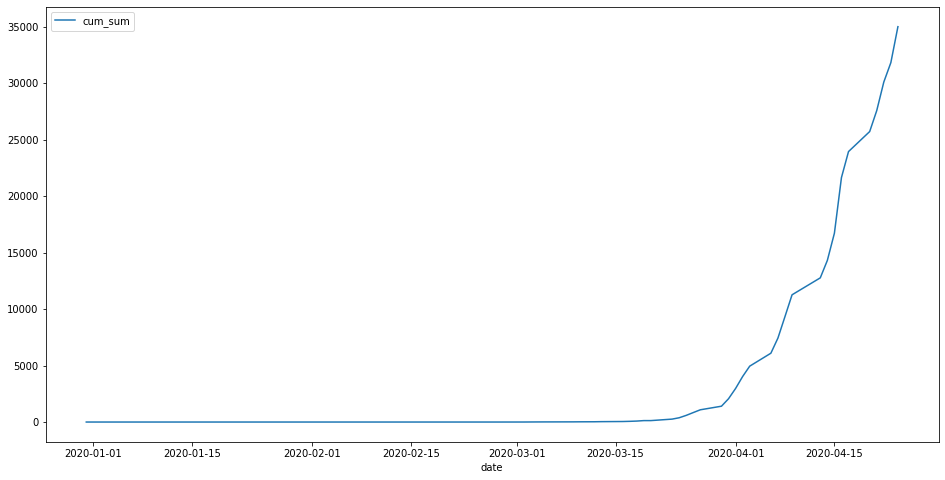

In [49]:
ax = plt.gca()

panda_df.plot(kind='line',x='date',y='cum_sum',ax=ax, figsize=(16,8))

plt.show()

In [53]:
normalize = df_sorted.withColumn("Normalizeddeaths", (F.col("deaths") / 50))

In [54]:
normalize.show(100)

+----------+-----------------------+------+--------+----------------+
|      date|countriesAndTerritories|deaths|VIX High|Normalizeddeaths|
+----------+-----------------------+------+--------+----------------+
|2019-12-31|   United_States_of_...|     0|   15.39|             0.0|
|2020-01-02|   United_States_of_...|     0|   13.72|             0.0|
|2020-01-03|   United_States_of_...|     0|    16.2|             0.0|
|2020-01-06|   United_States_of_...|     0|   16.39|             0.0|
|2020-01-07|   United_States_of_...|     0|   14.46|             0.0|
|2020-01-08|   United_States_of_...|     0|   15.24|             0.0|
|2020-01-09|   United_States_of_...|     0|   13.24|             0.0|
|2020-01-10|   United_States_of_...|     0|   12.87|             0.0|
|2020-01-13|   United_States_of_...|     0|   13.09|             0.0|
|2020-01-14|   United_States_of_...|     0|   13.82|             0.0|
|2020-01-15|   United_States_of_...|     0|   12.83|             0.0|
|2020-01-16|   Unite

In [55]:
panda_df = normalize.toPandas()

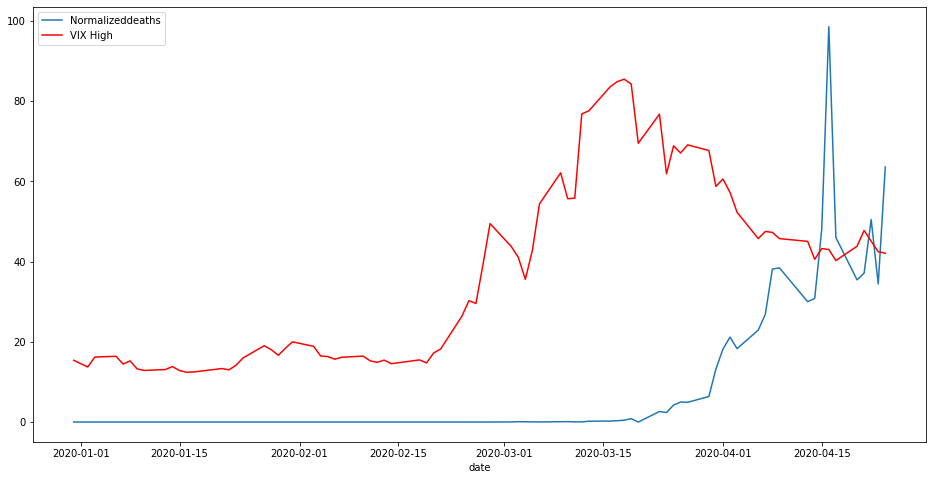

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

panda_df.plot(kind='line',x='date',y='Normalizeddeaths',ax=ax, figsize=(16,8))
panda_df.plot(kind='line',x='date',y='VIX High', color='red', ax=ax, figsize=(16,8))

plt.show()

In [192]:
csv_2_df = spark.read.csv("GyPmnAov.csv", header = "true")
csv_3 = csv_2_df.select("dateRep","deaths")
china_filtered = csv_3.filter(csv_2_df.countriesAndTerritories == "Spain")
china_filtered = china_filtered.withColumnRenamed("deaths", "Spain")

In [193]:
from datetime import datetime
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DateType
func =  udf (lambda x: datetime.strptime(x, '%d/%m/%Y'), DateType())
df = china_filtered.withColumn('date', func(col('dateRep')))

In [194]:
df = df.select("date","Spain")

In [195]:
df.show()

+----------+-----+
|      date|Spain|
+----------+-----+
|2020-04-25|  367|
|2020-04-24|  440|
|2020-04-23|  435|
|2020-04-22|  430|
|2020-04-21|  399|
|2020-04-20|  410|
|2020-04-19|  565|
|2020-04-18|  348|
|2020-04-17|  551|
|2020-04-16|  523|
|2020-04-15|  567|
|2020-04-14|  517|
|2020-04-13|  619|
|2020-04-12|  510|
|2020-04-11|  605|
|2020-04-10|  683|
|2020-04-09|  757|
|2020-04-08|  743|
|2020-04-07|  637|
|2020-04-06|  674|
+----------+-----+
only showing top 20 rows



In [196]:
inner_join = inner_join.join(df, on=['date'], how='inner')

In [197]:
inner_join.show()

+----------+-----------------------+------+--------+-----+-----+-----+
|      date|countriesAndTerritories|deaths|VIX High|China|Italy|Spain|
+----------+-----------------------+------+--------+-----+-----+-----+
|2019-12-31|   United_States_of_...|     0|   15.39|    0|    0|    0|
|2020-01-02|   United_States_of_...|     0|   13.72|    0|    0|    0|
|2020-01-03|   United_States_of_...|     0|    16.2|    0|    0|    0|
|2020-01-06|   United_States_of_...|     0|   16.39|    0|    0|    0|
|2020-01-07|   United_States_of_...|     0|   14.46|    0|    0|    0|
|2020-01-08|   United_States_of_...|     0|   15.24|    0|    0|    0|
|2020-01-09|   United_States_of_...|     0|   13.24|    0|    0|    0|
|2020-01-10|   United_States_of_...|     0|   12.87|    0|    0|    0|
|2020-01-13|   United_States_of_...|     0|   13.09|    0|    0|    0|
|2020-01-14|   United_States_of_...|     0|   13.82|    0|    0|    0|
|2020-01-15|   United_States_of_...|     0|   12.83|    1|    0|    0|
|2020-

In [198]:
combined = inner_join.withColumnRenamed("deaths", "United States")

In [199]:
combined.show()

+----------+-----------------------+-------------+--------+-----+-----+-----+
|      date|countriesAndTerritories|United States|VIX High|China|Italy|Spain|
+----------+-----------------------+-------------+--------+-----+-----+-----+
|2019-12-31|   United_States_of_...|            0|   15.39|    0|    0|    0|
|2020-01-02|   United_States_of_...|            0|   13.72|    0|    0|    0|
|2020-01-03|   United_States_of_...|            0|    16.2|    0|    0|    0|
|2020-01-06|   United_States_of_...|            0|   16.39|    0|    0|    0|
|2020-01-07|   United_States_of_...|            0|   14.46|    0|    0|    0|
|2020-01-08|   United_States_of_...|            0|   15.24|    0|    0|    0|
|2020-01-09|   United_States_of_...|            0|   13.24|    0|    0|    0|
|2020-01-10|   United_States_of_...|            0|   12.87|    0|    0|    0|
|2020-01-13|   United_States_of_...|            0|   13.09|    0|    0|    0|
|2020-01-14|   United_States_of_...|            0|   13.82|    0

In [200]:
combined = combined.select("date","United States","China","Italy","Spain","VIX High")


In [216]:
combined = combined.withColumn("Italy", combined["Italy"].cast(IntegerType()))
combined = combined.withColumn("China", combined["China"].cast(IntegerType()))
combined = combined.withColumn("United states", combined["United states"].cast(IntegerType()))
combined = combined.withColumn("Spain", combined["Spain"].cast(IntegerType()))

combined.show()
combined.printSchema()

+----------+-------------+-----+-----+-----+--------+
|      date|United states|China|Italy|Spain|VIX High|
+----------+-------------+-----+-----+-----+--------+
|2019-12-31|            0|    0|    0|    0|   15.39|
|2020-01-02|            0|    0|    0|    0|   13.72|
|2020-01-03|            0|    0|    0|    0|    16.2|
|2020-01-06|            0|    0|    0|    0|   16.39|
|2020-01-07|            0|    0|    0|    0|   14.46|
|2020-01-08|            0|    0|    0|    0|   15.24|
|2020-01-09|            0|    0|    0|    0|   13.24|
|2020-01-10|            0|    0|    0|    0|   12.87|
|2020-01-13|            0|    0|    0|    0|   13.09|
|2020-01-14|            0|    0|    0|    0|   13.82|
|2020-01-15|            0|    1|    0|    0|   12.83|
|2020-01-16|            0|    0|    0|    0|   12.42|
|2020-01-17|            0|    0|    0|    0|   12.48|
|2020-01-21|            0|    3|    0|    0|   13.33|
|2020-01-22|            0|   11|    0|    0|   13.01|
|2020-01-23|            0|  

In [133]:
combined.select("VIX High").rdd.max()[0]

85.47000122070312

In [208]:
combined.select("China").rdd.max()[0]
combined.select("Italy").rdd.max()[0]
combined.select("Spain").rdd.max()[0]
combined.select("United states").rdd.max()[0]

4928

In [217]:
pandas_df = combined.toPandas()

In [218]:
pandas_df

,date,United states,China,Italy,Spain,VIX High
0,2019-12-31,0,0,0,0,15.390000
1,2020-01-02,0,0,0,0,13.720000
2,2020-01-03,0,0,0,0,16.200001
3,2020-01-06,0,0,0,0,16.389999
4,2020-01-07,0,0,0,0,14.460000
...,...,...,...,...,...,...
75,2020-04-20,1772,0,433,410,43.830002
76,2020-04-21,1857,0,454,399,47.770000
77,2020-04-22,2524,0,534,430,45.070000
78,2020-04-23,1721,0,437,435,42.470001


In [219]:

normalize = combined.withColumn("VIX * 56.657", (F.col("VIX High") * 50.657))


In [220]:
normalize.show()
normalize.printSchema()
panda_df = normalize.toPandas()
panda_df

+----------+-------------+-----+-----+-----+--------+-----------------+
|      date|United states|China|Italy|Spain|VIX High|     VIX * 56.657|
+----------+-------------+-----+-----+-----+--------+-----------------+
|2019-12-31|            0|    0|    0|    0|   15.39|779.6112473917007|
|2020-01-02|            0|    0|    0|    0|   13.72|695.0140535268783|
|2020-01-03|            0|    0|    0|    0|    16.2|820.6434386482238|
|2020-01-06|            0|    0|    0|    0|   16.39|830.2681990814208|
|2020-01-07|            0|    0|    0|    0|   14.46|732.5002219324111|
|2020-01-08|            0|    0|    0|    0|   15.24|772.0126684055327|
|2020-01-09|            0|    0|    0|    0|   13.24|670.6986684055328|
|2020-01-10|            0|    0|    0|    0|   12.87|651.9555842027663|
|2020-01-13|            0|    0|    0|    0|   13.09|663.1001377296448|
|2020-01-14|            0|    0|    0|    0|   13.82|700.0797245407103|
|2020-01-15|            0|    1|    0|    0|   12.83|649.9293061

,date,United states,China,Italy,Spain,VIX High,VIX * 56.657
0,2019-12-31,0,0,0,0,15.390000,779.611247
1,2020-01-02,0,0,0,0,13.720000,695.014054
2,2020-01-03,0,0,0,0,16.200001,820.643439
3,2020-01-06,0,0,0,0,16.389999,830.268199
4,2020-01-07,0,0,0,0,14.460000,732.500222
...,...,...,...,...,...,...,...
75,2020-04-20,1772,0,433,410,43.830002,2220.296403
76,2020-04-21,1857,0,454,399,47.770000,2419.884913
77,2020-04-22,2524,0,534,430,45.070000,2283.110975
78,2020-04-23,1721,0,437,435,42.470001,2151.402852


In [221]:
normalize.printSchema()

root
 |-- date: date (nullable = true)
 |-- United states: integer (nullable = true)
 |-- China: integer (nullable = true)
 |-- Italy: integer (nullable = true)
 |-- Spain: integer (nullable = true)
 |-- VIX High: float (nullable = true)
 |-- VIX * 56.657: double (nullable = true)



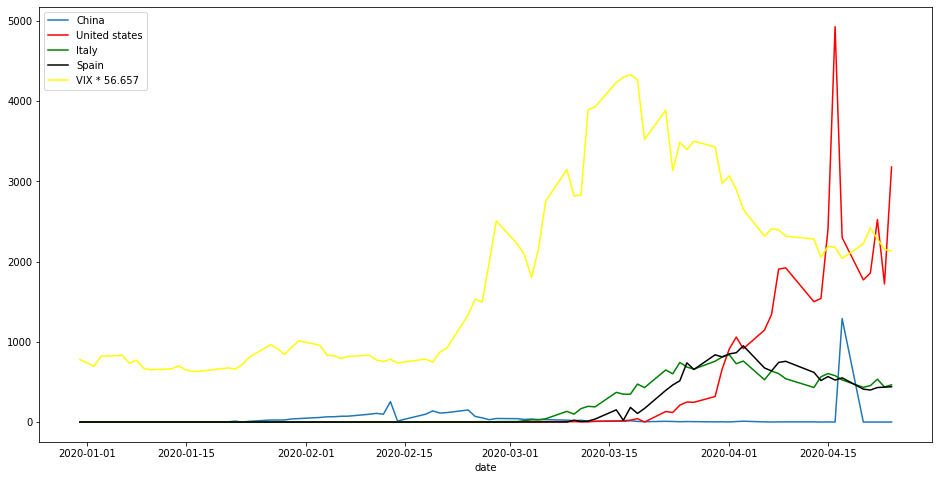

In [222]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

panda_df.plot(kind='line',x='date',y='China',ax=ax, figsize=(16,8))
panda_df.plot(kind='line',x='date',y='United states', color='red', ax=ax, figsize=(16,8))
panda_df.plot(kind='line',x='date',y='Italy', color='green', ax=ax, figsize=(16,8))
panda_df.plot(kind='line',x='date',y='Spain', color='black', ax=ax, figsize=(16,8))
panda_df.plot(kind='line',x='date',y='VIX * 56.657', color='yellow', ax=ax, figsize=(16,8))




plt.show()

In [224]:
combined.show()
combined.printSchema()

normalize.show()
normalize.printSchema()

+----------+-------------+-----+-----+-----+--------+
|      date|United states|China|Italy|Spain|VIX High|
+----------+-------------+-----+-----+-----+--------+
|2019-12-31|            0|    0|    0|    0|   15.39|
|2020-01-02|            0|    0|    0|    0|   13.72|
|2020-01-03|            0|    0|    0|    0|    16.2|
|2020-01-06|            0|    0|    0|    0|   16.39|
|2020-01-07|            0|    0|    0|    0|   14.46|
|2020-01-08|            0|    0|    0|    0|   15.24|
|2020-01-09|            0|    0|    0|    0|   13.24|
|2020-01-10|            0|    0|    0|    0|   12.87|
|2020-01-13|            0|    0|    0|    0|   13.09|
|2020-01-14|            0|    0|    0|    0|   13.82|
|2020-01-15|            0|    1|    0|    0|   12.83|
|2020-01-16|            0|    0|    0|    0|   12.42|
|2020-01-17|            0|    0|    0|    0|   12.48|
|2020-01-21|            0|    3|    0|    0|   13.33|
|2020-01-22|            0|   11|    0|    0|   13.01|
|2020-01-23|            0|  

In [149]:
sqlContext = SQLContext(sc)

In [223]:
combined.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
United states,80,437.375,904.8556409796307,0,4928
China,80,44.3625,147.82484022002512,0,1290
Italy,80,218.075,282.30281681157,0,839
Spain,80,193.6375,294.81391873046834,0,950
VIX High,80,36.805125057697296,22.742882981526396,12.42,85.47


In [152]:
panda_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
date,2019-12-31,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,...,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24
United states,0,0,0,0,0,0,0,0,0,0,...,1500,1541,2408,4928,2299,1772,1857,2524,1721,3179
China,0,0,0,0,0,0,0,0,0,0,...,2,0,1,0,1290,0,0,0,0,0
Italy,0,0,0,0,0,0,0,0,0,0,...,431,564,604,578,525,433,454,534,437,464
VIX High,15.39,13.72,16.2,16.39,14.46,15.24,13.24,12.87,13.09,13.82,...,45.04,40.57,43.23,43.02,40.26,43.83,47.77,45.07,42.47,42.08


In [254]:
x1 = combined.toPandas()['Spain'].values.tolist()
y1 = combined.toPandas()['VIX High'].values.tolist()

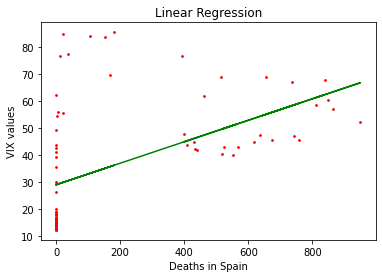

In [256]:
from numpy import polyfit
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x1, y1, color='red', s=3)
plt.xlabel('Deaths in Spain')
plt.ylabel('VIX values')
plt.title('Linear Regression')
p1 = polyfit(x1, y1, 1)
plt.plot(x1, np.polyval(p1,x1), 'g-' )
plt.show()

In [175]:
from pyspark import SQLContext, SparkConf, SparkContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [228]:
combined2 = combined.select(combined["Italy"],combined["Spain"],combined["VIX High"].alias("label"))

In [245]:
train, test = combined2.randomSplit([0.7,0.3])


In [246]:
assembler = VectorAssembler().setInputCols(['Italy','Spain'])\
.setOutputCol('features')
train01 = assembler.transform(train)
train02 = train01.select("features","label")
train02.show(100,truncate=False)

+-------------+-----+
|features     |label|
+-------------+-----+
|(2,[],[])    |15.39|
|(2,[],[])    |13.72|
|(2,[],[])    |14.46|
|(2,[],[])    |15.24|
|(2,[],[])    |12.87|
|(2,[],[])    |13.09|
|(2,[],[])    |12.42|
|(2,[],[])    |12.48|
|(2,[],[])    |13.01|
|(2,[],[])    |14.15|
|(2,[],[])    |15.98|
|(2,[],[])    |19.02|
|(2,[],[])    |18.03|
|(2,[],[])    |18.39|
|(2,[],[])    |19.99|
|(2,[],[])    |16.46|
|(2,[],[])    |16.32|
|(2,[],[])    |15.66|
|(2,[],[])    |16.16|
|(2,[],[])    |16.43|
|(2,[],[])    |15.27|
|(2,[],[])    |14.88|
|(2,[],[])    |14.54|
|(2,[],[])    |15.49|
|(2,[],[])    |14.74|
|(2,[],[])    |17.21|
|(2,[],[])    |18.21|
|[4.0,0.0]    |30.25|
|[5.0,0.0]    |29.57|
|[1.0,0.0]    |39.31|
|[5.0,0.0]    |49.48|
|[6.0,0.0]    |43.77|
|[17.0,0.0]   |41.06|
|[28.0,0.0]   |35.58|
|[27.0,1.0]   |42.84|
|[133.0,0.0]  |62.12|
|[167.0,7.0]  |55.82|
|[370.0,152.0]|83.56|
|[347.0,21.0] |84.83|
|[347.0,182.0]|85.47|
|[649.0,394.0]|76.74|
|[601.0,462.0]|61.88|
|[743.0,51

In [249]:
lr = LinearRegression()
model = lr.fit(train02)
test01 = assembler.transform(test)
test02 = test01.select('features', 'label')
test03 = model.transform(test02)
test03.show(truncate=False)

+-------------+-----+------------------+
|features     |label|prediction        |
+-------------+-----+------------------+
|(2,[],[])    |16.2 |21.358814607858584|
|(2,[],[])    |16.39|21.358814607858584|
|(2,[],[])    |13.24|21.358814607858584|
|(2,[],[])    |13.82|21.358814607858584|
|(2,[],[])    |12.83|21.358814607858584|
|(2,[],[])    |13.33|21.358814607858584|
|(2,[],[])    |16.65|21.358814607858584|
|(2,[],[])    |18.88|21.358814607858584|
|(2,[],[])    |15.44|21.358814607858584|
|(2,[],[])    |26.35|21.358814607858584|
|[41.0,2.0]   |54.39|28.017846983129328|
|[98.0,23.0]  |55.66|35.179137114071665|
|[196.0,12.0] |76.83|52.911596569067996|
|[189.0,37.0] |77.57|48.858827562539844|
|[473.0,107.0]|84.26|88.52444977166127 |
|[429.0,169.0]|69.51|73.99731016713832 |
|[760.0,950.0]|52.29|39.750572559106   |
|[527.0,674.0]|45.73|32.357338281777054|
|[540.0,757.0]|45.73|24.991488808196443|
|[431.0,619.0]|45.04|22.555083513094225|
+-------------+-----+------------------+
only showing top

In [250]:
evaluator = RegressionEvaluator()
print(evaluator.evaluate(test03,{evaluator.metricName: "r2"}))
print(evaluator.evaluate(test03,
{evaluator.metricName: "mse"})
)
print(evaluator.evaluate(test03,
{evaluator.metricName: "rmse"})
)


0.6236788281988594
205.587875971748
14.338335885720769


In [261]:
combined.show()
combined.printSchema()

+----------+-------------+-----+-----+-----+--------+
|      date|United states|China|Italy|Spain|VIX High|
+----------+-------------+-----+-----+-----+--------+
|2019-12-31|            0|    0|    0|    0|   15.39|
|2020-01-02|            0|    0|    0|    0|   13.72|
|2020-01-03|            0|    0|    0|    0|    16.2|
|2020-01-06|            0|    0|    0|    0|   16.39|
|2020-01-07|            0|    0|    0|    0|   14.46|
|2020-01-08|            0|    0|    0|    0|   15.24|
|2020-01-09|            0|    0|    0|    0|   13.24|
|2020-01-10|            0|    0|    0|    0|   12.87|
|2020-01-13|            0|    0|    0|    0|   13.09|
|2020-01-14|            0|    0|    0|    0|   13.82|
|2020-01-15|            0|    1|    0|    0|   12.83|
|2020-01-16|            0|    0|    0|    0|   12.42|
|2020-01-17|            0|    0|    0|    0|   12.48|
|2020-01-21|            0|    3|    0|    0|   13.33|
|2020-01-22|            0|   11|    0|    0|   13.01|
|2020-01-23|            0|  

In [267]:
from pyspark.sql.functions import month, mean,min, max

(combined
    .groupBy(month("date"))
    .agg(max("VIX High"))
    .show())

+-----------+-------------+
|month(date)|max(VIX High)|
+-----------+-------------+
|         12|        15.39|
|          1|        19.99|
|          3|        85.47|
|          4|        60.59|
|          2|        49.48|
+-----------+-------------+



In [272]:
group_by_month_max = (combined
    .groupBy(month("date"))
    .agg(max("VIX High"))
    .show())
group_by_month_min = (combined
    .groupBy(month("date"))
    .agg(min("VIX High"))
    .show())
group_by_month_avg = (combined
    .groupBy(month("date"))
    .agg(mean("VIX High"))
    .show())


+-----------+-------------+
|month(date)|max(VIX High)|
+-----------+-------------+
|         12|        15.39|
|          1|        19.99|
|          3|        85.47|
|          4|        60.59|
|          2|        49.48|
+-----------+-------------+

+-----------+-------------+
|month(date)|min(VIX High)|
+-----------+-------------+
|         12|        15.39|
|          1|        12.42|
|          3|        35.58|
|          4|        40.26|
|          2|        14.54|
+-----------+-------------+

+-----------+------------------+
|month(date)|     avg(VIX High)|
+-----------+------------------+
|         12|15.390000343322754|
|          1|15.014761833917527|
|          3|  64.6977275501598|
|          4|46.453529582304114|
|          2|21.086841934605648|
+-----------+------------------+



In [281]:
vix_and_date = combined.select(month("date"),"VIX High")
vix_and_date.show()
vix_and_date.printSchema()

+-----------+--------+
|month(date)|VIX High|
+-----------+--------+
|         12|   15.39|
|          1|   13.72|
|          1|    16.2|
|          1|   16.39|
|          1|   14.46|
|          1|   15.24|
|          1|   13.24|
|          1|   12.87|
|          1|   13.09|
|          1|   13.82|
|          1|   12.83|
|          1|   12.42|
|          1|   12.48|
|          1|   13.33|
|          1|   13.01|
|          1|   14.15|
|          1|   15.98|
|          1|   19.02|
|          1|   18.03|
|          1|   16.65|
+-----------+--------+
only showing top 20 rows

root
 |-- month(date): integer (nullable = true)
 |-- VIX High: float (nullable = true)



In [ ]:
group_by_month = (vix_and_date
    .groupBy(month("date"))
    .agg(max("VIX High"))
    .show())

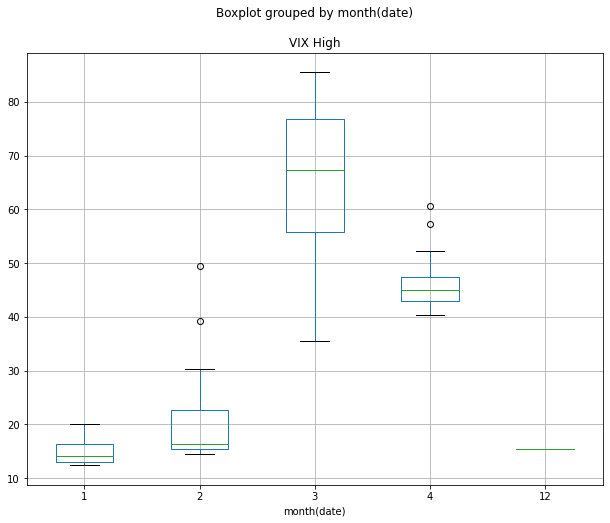

In [285]:
import pandas as pd
import matplotlib.pyplot as plt

pandas_df = vix_and_date.toPandas()
pandas_df.boxplot(column=["VIX High"],by="month(date)", figsize=(10,8))

plt.show()